# 21 Years of the Euro

Throughout this project we will compare the exchange rate of the Euro against the US Dollar along a 21 year period.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')

print(exchange_rates.head(5))
print(exchange_rates.tail(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

This dataset contains 5699 rows and 41 columns. There are several null values. the values are a mixture of strings and floats.

In [4]:
#This code was provided by the course. Nevertheless with a quick google search
#it is easy to understand what the code does.
# rename [US dollar] to US_dollar, the same with Period/Unit.
#change the Time column to a datetime data type
#sort the Time values in ascending order.
#reset the indexes, dropping the original ones.
#The focus of this project is explanatory graphs, so the cleaning of the data
#has a secondary role.
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)


In [5]:
euro_to_dollar=exchange_rates[['Time','US_dollar']]
exchange_rates['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.2830     1
1.2892     1
1.2750     1
1.2813     1
1.2822     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
to_drop=euro_to_dollar['US_dollar'][euro_to_dollar['US_dollar']=='-']

euro_to_dollar=euro_to_dollar.drop(to_drop.index,axis=0)

In [7]:
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)


In [8]:
euro_to_dollar['rolling_mean']=euro_to_dollar['US_dollar'].rolling(30).mean()

## Coming up with an idea.
We will analyze and compare how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data from 2006 and 2009 for comparison.

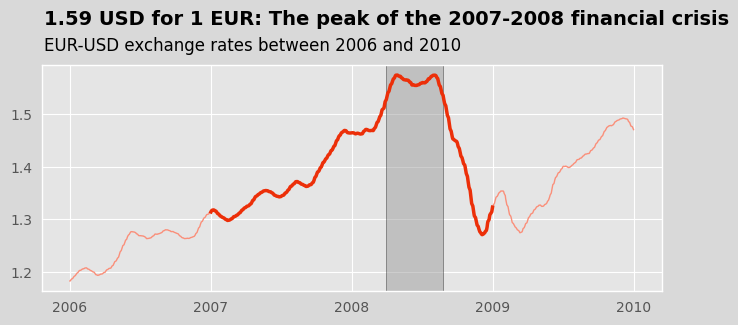

In [118]:
import matplotlib.style as style

style.use('ggplot')

condition=(euro_to_dollar['Time'].dt.year<=2009)&(euro_to_dollar['Time'].dt.year>=2006)
condition2=(euro_to_dollar['Time'].dt.year<=2008)&(euro_to_dollar['Time'].dt.year>=2007)

fin_cry=euro_to_dollar[condition]
fin_cry_peak=euro_to_dollar[condition2]

fig,ax=plt.subplots(figsize=(8,3))

ax.plot(fin_cry['Time'],fin_cry['rolling_mean'],linewidth=1,color='#fa8f7a')
ax.plot(fin_cry_peak['Time'],fin_cry_peak['rolling_mean'],linewidth=2.5,color='#ec2f09')


ax.axvspan(xmin=733130.0, xmax=733280.0, ymin=0,facecolor='#9c9c9c',alpha=0.5,edgecolor='black')
dates=[732312, 732677, 733042, 733408,
     733773]
tickyears=['2006','2007','2008','2009','2010']
ax.set_xticks(dates)
ax.set_xticklabels(tickyears)
ax.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)

ax.text(732245,1.67,s='1.59 USD for 1 EUR: The peak of the 2007-2008 financial crisis',weight='bold',size=14)
ax.text(732245,1.62,s='EUR-USD exchange rates between 2006 and 2010',size=12)

fig.set_facecolor('#d9d9d9')